# EDA and Mapping

### imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

### csv cleaned data import

In [2]:
df_import = pd.read_csv('data/everything.csv')

### First map -- All House Sales in Seattle's King County

In [3]:
# Create a map centered around Seattle
seattle_coords = (47.6062, -122.3321)
m = folium.Map(location=seattle_coords, zoom_start=10)

# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house using latitude and longitude
for _, row in df_import.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('maps/house_sales_map_all.html')

# Display HTML file using an iframe
display(m)

### Second Map -- All House Sales with Waterfront Value of Yes or None

In [4]:
# Filter the DataFrame to include rows where 'waterfront' is 1.0 or NaN
filtered_data = df_import[df_import['waterfront'].isin([1.0, float('nan')])]

m = folium.Map(location=seattle_coords, zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)
# Add markers for each house using latitude and longitude
for _, row in filtered_data.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)
    
# Save the map to an HTML file
m.save('maps/house_sales_map_waterfront.html')

# Display HTML file using an iframe
display(m)

### Third Map -- Sales within 25km of City Center, Waterfront Yes or None

In [5]:
# Define the radius (in kilometers) within which to include houses
radius_km = 25

# Function to calculate the distance between two points in kilometers
def distance_to_center(row):
    house_coords = (row['lat'], row['long'])
    return geodesic(seattle_coords, house_coords).kilometers

# Filter the DataFrame to include rows where 'waterfront' is 1.0 or NaN
filter1 = df_import[df_import['waterfront'].isin([1.0, float('nan')])]
# Filter the DataFrame to include only rows within the specified radius
filtered2 = filter1[filter1.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in filtered2.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('maps/house_sales_map_within_radius_waterfront.html')

# Display HTML file using an iframe
display(m)

### Third Map -- Sales within 25km of City Center, Waterfront Yes Only

In [6]:
# Filter the DataFrame to include rows where 'waterfront' is 1.0
filter1 = df_import[df_import['waterfront'].isin([1.0])]
# Filter the DataFrame to include only rows within the specified radius
filtered2 = filter1[filter1.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in filtered2.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('maps/house_sales_map_within_radius_waterfront_notNaN.html')

# Display HTML file using an iframe
display(m)

### Export House Data within 25km of City Center, Confirmed Waterfront

In [7]:
filtered2.to_csv('data/25km_waterfront.csv',index=True)

### Import into fresh dataframe 

In [8]:
df_filtered = pd.read_csv('data/25km_waterfront.csv')
df_filtered

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
3           264    265  2014-10-27   369900.0  2123039032       1.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
..          ...    ...         ...        ...         ...       ...   
121       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
122       20309  20310  2014-08-11  3000000.0   518500480       3.0   
123       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
124       21185  21186  2014-10-08  2230000.0   518500460       3.0   
125       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  sqft_above  sqft_basement  \
0         2.50       2753.0   65005.0     1.0  ...      2165.0          588.0   
1         1.75       1450.0   15798.0     2.0  ...      1230.0          220.0   
2         2.50       3650.0    8354.0     1.0  ...      1830.0         1820.0   
3         0.75        760.0   10079.0     1.0  ...       760.0            0.0   
4         5.00       4550.0   18641.0     1.0  ...      2600.0         1950.0   
..         ...          ...       ...     ...  ...         ...            ...   
121       2.50       2830.0    4334.0     3.0  ...      2830.0            0.0   
122       3.50       4410.0   10756.0     2.0  ...      3430.0          980.0   
123       4.00       4360.0    8175.0     2.5  ...      3940.0          420.0   
124       3.50       3760.0    5634.0     2.0  ...      2830.0          930.0   
125       4.50       4850.0   10584.0     2.0  ...      3540.0         1310.0   

     yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0        1953           NaN    98070  47.4041 -122.451         2680.0   
1        1915        1978.0    98166  47.4497 -122.375         2030.0   
2        2000           NaN    98074  47.6338 -122.072         3120.0   
3        1936           NaN    98070  47.4683 -122.438         1230.0   
4        2002           NaN    98074  47.6053 -122.077         4550.0   
..        ...           ...      ...      ...      ...            ...   
121      2006           NaN    98074  47.6318 -122.071         2830.0   
122      2014           NaN    98056  47.5283 -122.205         3550.0   
123      2007           NaN    98008  47.5724 -122.104         2670.0   
124      2014           NaN    98056  47.5285 -122.205         3560.0   
125      2007           NaN    98008  47.5943 -122.110         3470.0   

     sqft_lot15  price_sqft  
0       72513.0  490.374137  
1       13193.0  451.724138  
2       18841.0  657.534247  
3       14267.0  486.710526  
4       19508.0  676.923077  
..          ...         ...  
121     38211.0  671.378092  
122      5634.0  680.272109  
123      8525.0  527.522936  
124      5762.0  593.085106  
125     18270.0  736.082474  

[126 rows x 24 columns]

### Remaining Zip Code Information

In [9]:
df_filtered['zipcode'].nunique()

28

In [10]:
df_filtered['zipcode'].value_counts()

zipcode
98166    14
98070    11
98040    11
98008     9
98178     9
98075     8
98074     6
98146     6
98125     6
98034     5
98155     5
98136     5
98006     4
98052     3
98056     3
98118     3
98105     3
98033     3
98144     2
98027     2
98198     1
98039     1
98177     1
98199     1
98115     1
98116     1
98004     1
98028     1
Name: count, dtype: int64

### Price Distribution of each Remaining Zip Code

In [11]:
df_filtered.groupby('zipcode')['price'].describe()

count          mean           std        min        25%        50%  \
zipcode                                                                       
98004      1.0  7.060000e+06           NaN  7060000.0  7060000.0  7060000.0   
98006      4.0  1.575000e+06  3.926406e+05  1000000.0  1487500.0  1725000.0   
98008      9.0  2.572222e+06  8.460464e+05  1400000.0  1700000.0  2700000.0   
98027      2.0  2.400000e+06  2.828427e+05  2200000.0  2300000.0  2400000.0   
98028      1.0  1.600000e+06           NaN  1600000.0  1600000.0  1600000.0   
98033      3.0  3.736667e+06  1.239771e+06  2700000.0  3050000.0  3400000.0   
98034      5.0  2.550000e+06  7.156116e+05  1600000.0  1960000.0  3000000.0   
98039      1.0  3.640000e+06           NaN  3640000.0  3640000.0  3640000.0   
98040     11.0  3.015455e+06  1.225172e+06  1200000.0  2225000.0  2700000.0   
98052      3.0  1.683333e+06  5.251984e+05  1150000.0  1425000.0  1700000.0   
98056      3.0  2.266667e+06  7.157048e+05  1570000.0  1900000.0  2230000.0   
98070     11.0  5.216273e+05  3.117314e+05   285000.0   340000.0   385000.0   
98074      6.0  1.998333e+06  7.128090e+05   960000.0  1712500.0  1950000.0   
98075      8.0  2.033750e+06  7.007942e+05  1250000.0  1430000.0  1925000.0   
98105      3.0  3.053333e+06  5.522982e+05  2560000.0  2755000.0  2950000.0   
98115      1.0  2.300000e+06           NaN  2300000.0  2300000.0  2300000.0   
98116      1.0  1.710000e+06           NaN  1710000.0  1710000.0  1710000.0   
98118      3.0  1.819983e+06  9.918384e+05   949950.0  1279975.0  1610000.0   
98125      6.0  1.461667e+06  3.434773e+05  1150000.0  1227500.0  1350000.0   
98136      5.0  1.413600e+06  5.826961e+05   658000.0  1180000.0  1340000.0   
98144      2.0  2.750000e+06  1.202082e+06  1900000.0  2325000.0  2750000.0   
98146      6.0  1.005833e+06  3.188168e+05   540000.0   806250.0  1067500.0   
98155      5.0  2.202000e+06  1.311800e+06  1180000.0  1680000.0  1800000.0   
98166     14.0  1.248286e+06  6.204680e+05   380000.0   814375.0   991750.0   
98177      1.0  1.300000e+06           NaN  1300000.0  1300000.0  1300000.0   
98178      9.0  9.193889e+05  3.164931e+05   700000.0   750000.0   825000.0   
98198      1.0  9.500000e+05           NaN   950000.0   950000.0   950000.0   
98199      1.0  1.880000e+06           NaN  1880000.0  1880000.0  1880000.0   

               75%        max  
zipcode                        
98004    7060000.0  7060000.0  
98006    1812500.0  1850000.0  
98008    3300000.0  3570000.0  
98027    2500000.0  2600000.0  
98028    1600000.0  1600000.0  
98033    4255000.0  5110000.0  
98034    3070000.0  3120000.0  
98039    3640000.0  3640000.0  
98040    3625000.0  5300000.0  
98052    1950000.0  2200000.0  
98056    2615000.0  3000000.0  
98070     581500.0  1350000.0  
98074    2300000.0  3080000.0  
98075    2487500.0  3200000.0  
98105    3300000.0  3650000.0  
98115    2300000.0  2300000.0  
98116    1710000.0  1710000.0  
98118    2255000.0  2900000.0  
98125    1600000.0  2050000.0  
98136    1660000.0  2230000.0  
98144    3175000.0  3600000.0  
98146    1190000.0  1410000.0  
98155    1850000.0  4500000.0  
98166    1625000.0  2510000.0  
98177    1300000.0  1300000.0  
98178     869000.0  1700000.0  
98198     950000.0   950000.0  
98199    1880000.0  1880000.0

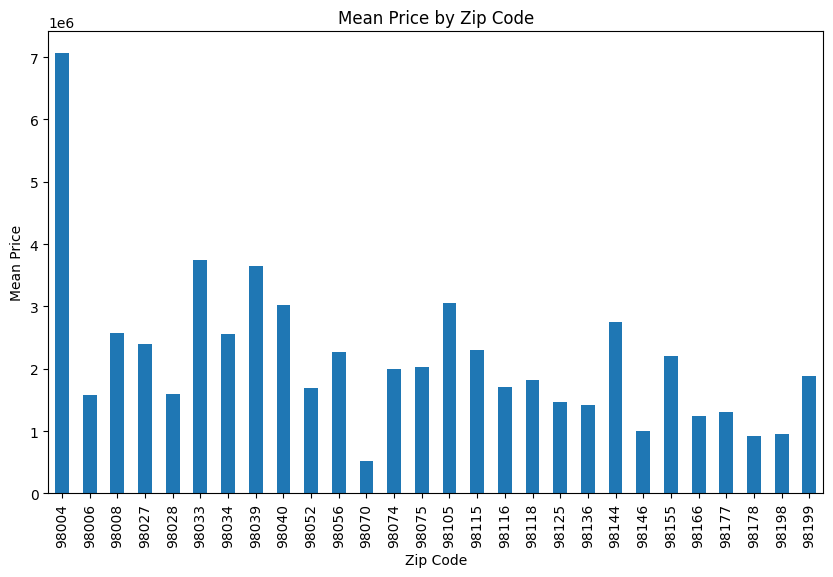

In [12]:
# New DataFrame of the previous described price distribution table
price_description_by_zip = df_filtered.groupby('zipcode')['price'].describe()

# Plot mean price for each zip code
price_description_by_zip['mean'].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Mean Price')
plt.show()

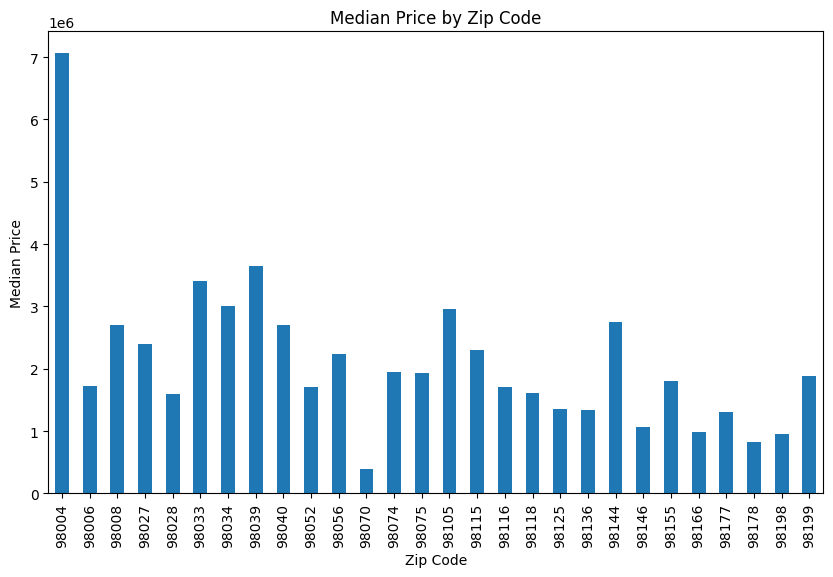

In [13]:
# Plot the median price for each zip code
price_description_by_zip['50%'].plot(kind='bar', figsize=(10, 6))
plt.title('Median Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Median Price')
plt.show()

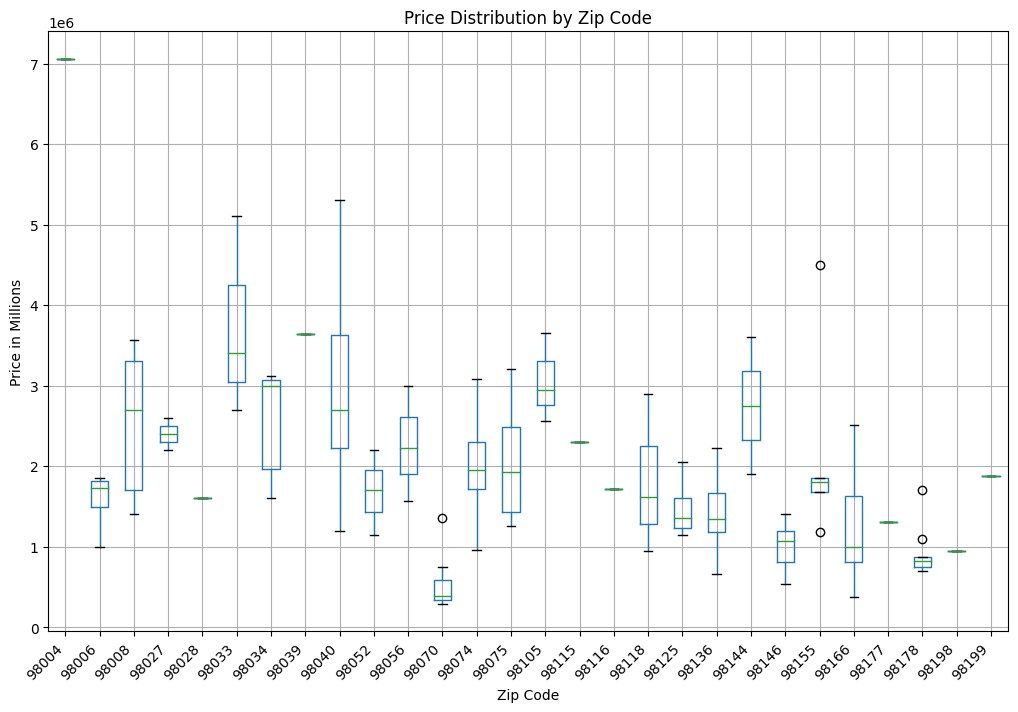

In [14]:
# Create a box plot of prices grouped by zip code
ax = df_filtered.boxplot(column='price', by='zipcode', figsize=(12, 8))
plt.title('Price Distribution by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Price in Millions')
plt.suptitle('')

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

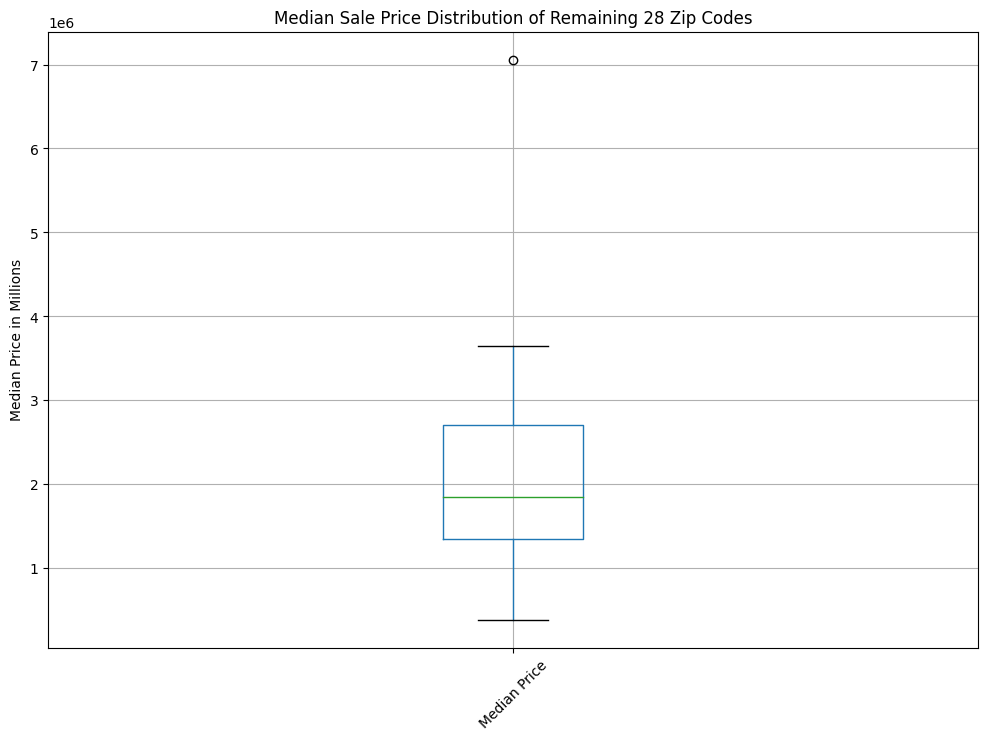

In [15]:
# Calculate the median price for each zip code
median_prices_by_zip = df_filtered.groupby('zipcode')['price'].median()

# Create a DataFrame with the median prices
median_prices_df = pd.DataFrame({'Zip Code': median_prices_by_zip.index, 'Median Price': median_prices_by_zip.values})

# Create a box plot of median prices
plt.figure(figsize=(12, 8))
median_prices_df.boxplot(column='Median Price')
plt.title('Median Sale Price Distribution of Remaining 28 Zip Codes')
plt.ylabel('Median Price in Millions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Deciding to Drop Outlier Pricey Zip Code 98004

In [16]:
df_filtered2 = df_filtered[df_filtered['zipcode'] != 98004]
df_filtered2['zipcode'].nunique()

27

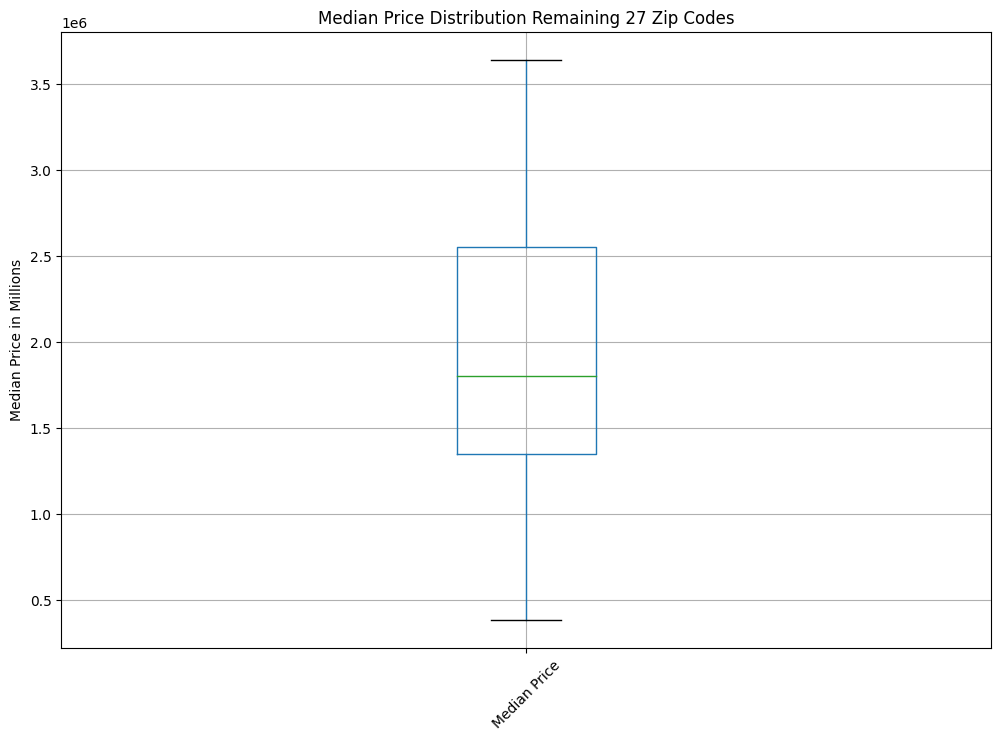

In [17]:
# Calculate the median price for each zip code
median_prices_by_zip = df_filtered2.groupby('zipcode')['price'].median()

# Create a DataFrame with the median prices
median_prices_df = pd.DataFrame({'Zip Code': median_prices_by_zip.index, 'Median Price': median_prices_by_zip.values})

# Create a box plot of median prices
plt.figure(figsize=(12, 8))
median_prices_df.boxplot(column='Median Price')
plt.title('Median Price Distribution Remaining 27 Zip Codes')
plt.ylabel('Median Price in Millions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Upper Middle Class Price Cap Determined as ~$2.6 Million 
### (The Top Limit of the Middle 50% Distribution--the Box; or end of the 3rd Quartile)

### Exploring Age Distribution of Remaining 27 Zip Codes

<Axes: xlabel='Zip Code'>

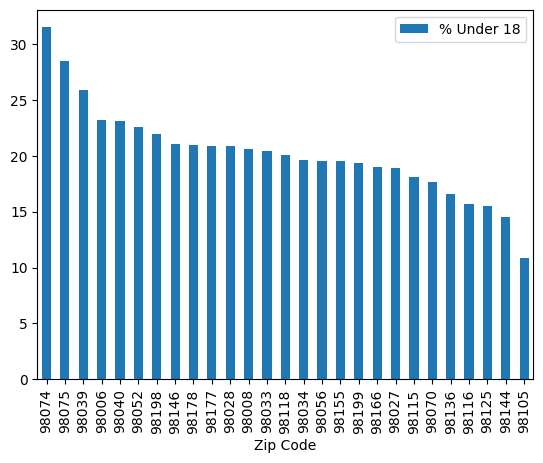

In [18]:
data = [
    "98070: 17.7%, 27.2%, 80.2%;",
    "98166: 19.0%, 19.4%, 78.0%;",
    "98074: 31.5%, 7.8%, 65.9%;",
    "98034: 19.6%, 14.6%, 78.4%;",
    "98178: 21.0%, 16.5%, 76.3%;",
    "98033: 20.4%, 13.5%, 76.0%;",
    "98040: 23.1%, 20.4%, 73.9%;",
    "98052: 22.6%, 11.2%, 75.4%;",
    "98155: 19.5%, 17.7%, 78.3%;",
    "98008: 20.6%, 19.6%, 77.0%;",
    "98006: 23.2%, 15.5%, 73.2%;",
    "98075: 28.5%, 9.0%, 69.0%;",
    "98144: 14.5%, 16.8%, 83.9%;",
    "98199: 19.4%, 15.4%, 79.9%;",
    "98056: 19.5%, 13.6%, 78.0%;",
    "98146: 21.1%, 14.7%, 75.9%;",
    "98116: 15.7%, 14.7%, 82.8%;",
    "98027: 18.9%, 15.5%, 78.4%;",
    "98118: 20.1%, 13.8%, 77.6%;",
    "98136: 16.6%, 14.6%, 82.0%;",
    "98105: 10.9%, 7.6%, 65.9%;",
    "98125: 15.5%, 17.0%, 82.4%;",
    "98115: 18.1%, 13.4%, 80.0%;",
    "98198: 22.0%, 15.5%, 74.8%;",
    "98177: 20.9%, 21.1%, 77.3%;",
    "98039: 25.9%, 18.3%, 71.2%;",
    "98028: 20.9%, 16.1%, 76.3%;"
]

# Initialize lists to store data
zip_codes = []
under_18 = []
over_65 = []
over_21 = []

# Parse each line of data
for line in data:
    parts = line.strip().split(": ")
    zip_code = parts[0]
    percentages = parts[1].split(", ")
    under_18_percent = float(percentages[0][:-1]) # Remove the '%'
    over_65_percent = float(percentages[1][:-1])  # Remove the '%'
    over_21_percent = float(percentages[2][:-2])  # Remove the '%' and ';'
    # Append data to lists
    zip_codes.append(zip_code)
    under_18.append(under_18_percent)
    over_65.append(over_65_percent)
    over_21.append(over_21_percent)

# Create DataFrame
df_ages = pd.DataFrame({
    "zipcode": zip_codes,
    "% Under 18": under_18,
    "% Over 65": over_65,
    "% Over 21": over_21
})

# Set the index of the DataFrame to 'Zip Code'
df_ages.set_index('zipcode', inplace=True)

# Sort the DataFrame by '% Under 18' column
df_ages_sorted = df_ages.sort_values(by='% Under 18', ascending=False)

# Plot the bar graph with zip codes on the x-axis
df_ages_sorted['% Under 18'].plot(kind='bar', legend=True, xlabel='Zip Code')



### Adding Age Data to Original DataFrame

In [19]:
# Write DataFrame to a CSV file
df_ages.to_csv('data/ages.csv')

# Read the CSV file into a new DataFrame
df_ages_import = pd.read_csv('data/ages.csv', index_col='zipcode')

df_ages_import
df_merged = df_filtered2.merge(df_ages_import, how='left', left_on='zipcode', right_on='zipcode')

df_merged

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
3           264    265  2014-10-27   369900.0  2123039032       1.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
..          ...    ...         ...        ...         ...       ...   
120       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
121       20309  20310  2014-08-11  3000000.0   518500480       3.0   
122       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
123       21185  21186  2014-10-08  2230000.0   518500460       3.0   
124       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  yr_renovated  zipcode  \
0         2.50       2753.0   65005.0     1.0  ...           NaN    98070   
1         1.75       1450.0   15798.0     2.0  ...        1978.0    98166   
2         2.50       3650.0    8354.0     1.0  ...           NaN    98074   
3         0.75        760.0   10079.0     1.0  ...           NaN    98070   
4         5.00       4550.0   18641.0     1.0  ...           NaN    98074   
..         ...          ...       ...     ...  ...           ...      ...   
120       2.50       2830.0    4334.0     3.0  ...           NaN    98074   
121       3.50       4410.0   10756.0     2.0  ...           NaN    98056   
122       4.00       4360.0    8175.0     2.5  ...           NaN    98008   
123       3.50       3760.0    5634.0     2.0  ...           NaN    98056   
124       4.50       4850.0   10584.0     2.0  ...           NaN    98008   

         lat     long  sqft_living15  sqft_lot15  price_sqft  % Under 18  \
0    47.4041 -122.451         2680.0     72513.0  490.374137        17.7   
1    47.4497 -122.375         2030.0     13193.0  451.724138        19.0   
2    47.6338 -122.072         3120.0     18841.0  657.534247        31.5   
3    47.4683 -122.438         1230.0     14267.0  486.710526        17.7   
4    47.6053 -122.077         4550.0     19508.0  676.923077        31.5   
..       ...      ...            ...         ...         ...         ...   
120  47.6318 -122.071         2830.0     38211.0  671.378092        31.5   
121  47.5283 -122.205         3550.0      5634.0  680.272109        19.5   
122  47.5724 -122.104         2670.0      8525.0  527.522936        20.6   
123  47.5285 -122.205         3560.0      5762.0  593.085106        19.5   
124  47.5943 -122.110         3470.0     18270.0  736.082474        20.6   

     % Over 65  % Over 21  
0         27.2       80.2  
1         19.4       78.0  
2          7.8       65.9  
3         27.2       80.2  
4          7.8       65.9  
..         ...        ...  
120        7.8       65.9  
121       13.6       78.0  
122       19.6       77.0  
123       13.6       78.0  
124       19.6       77.0  

[125 rows x 27 columns]

### Price of Remaining House Sales by Number of Bedrooms

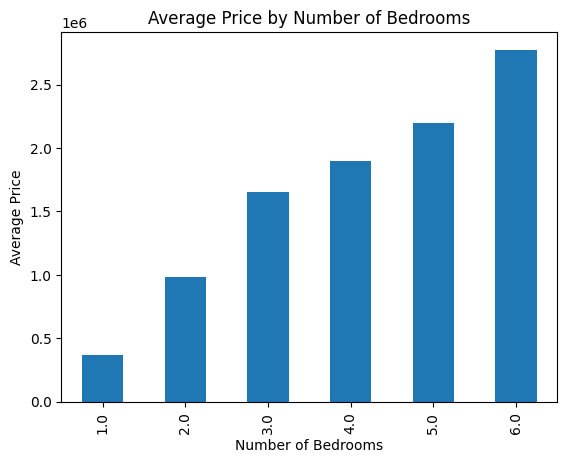

In [20]:
grouped_prices = df_merged.groupby('bedrooms')['price'].median()

# Plot the bar graph
grouped_prices.plot(kind='bar')

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms')

# Show the plot
plt.show()

### Dropping House Sales with 1 Bedroom, Client has Two PreTeen Daughters

In [21]:
df_merged_bedrooms = df_merged[df_merged['bedrooms'] != 1.0]
df_merged_bedrooms

Unnamed: 0     id        date      price    house_id  bedrooms  \
0            49     50  2015-03-11  1350000.0   822039084       3.0   
1           230    231  2015-04-13   655000.0  8096000060       2.0   
2           246    247  2014-09-29  2400000.0  2025069065       4.0   
4           300    301  2014-06-24  3080000.0  3225069065       4.0   
5           540    541  2015-02-18  2130000.0   622049114       3.0   
..          ...    ...         ...        ...         ...       ...   
120       19968  19969  2015-03-17  1900000.0  2025069140       3.0   
121       20309  20310  2014-08-11  3000000.0   518500480       3.0   
122       20751  20752  2015-04-17  2300000.0  8043700105       4.0   
123       21185  21186  2014-10-08  2230000.0   518500460       3.0   
124       21560  21561  2015-01-07  3570000.0  9253900271       5.0   

     bathrooms  sqft_living  sqft_lot  floors  ...  yr_renovated  zipcode  \
0         2.50       2753.0   65005.0     1.0  ...           NaN    98070   
1         1.75       1450.0   15798.0     2.0  ...        1978.0    98166   
2         2.50       3650.0    8354.0     1.0  ...           NaN    98074   
4         5.00       4550.0   18641.0     1.0  ...           NaN    98074   
5         2.50       5403.0   24069.0     2.0  ...           NaN    98166   
..         ...          ...       ...     ...  ...           ...      ...   
120       2.50       2830.0    4334.0     3.0  ...           NaN    98074   
121       3.50       4410.0   10756.0     2.0  ...           NaN    98056   
122       4.00       4360.0    8175.0     2.5  ...           NaN    98008   
123       3.50       3760.0    5634.0     2.0  ...           NaN    98056   
124       4.50       4850.0   10584.0     2.0  ...           NaN    98008   

         lat     long  sqft_living15  sqft_lot15  price_sqft  % Under 18  \
0    47.4041 -122.451         2680.0     72513.0  490.374137        17.7   
1    47.4497 -122.375         2030.0     13193.0  451.724138        19.0   
2    47.6338 -122.072         3120.0     18841.0  657.534247        31.5   
4    47.6053 -122.077         4550.0     19508.0  676.923077        31.5   
5    47.4169 -122.348         3980.0    104374.0  394.225430        19.0   
..       ...      ...            ...         ...         ...         ...   
120  47.6318 -122.071         2830.0     38211.0  671.378092        31.5   
121  47.5283 -122.205         3550.0      5634.0  680.272109        19.5   
122  47.5724 -122.104         2670.0      8525.0  527.522936        20.6   
123  47.5285 -122.205         3560.0      5762.0  593.085106        19.5   
124  47.5943 -122.110         3470.0     18270.0  736.082474        20.6   

     % Over 65  % Over 21  
0         27.2       80.2  
1         19.4       78.0  
2          7.8       65.9  
4          7.8       65.9  
5         19.4       78.0  
..         ...        ...  
120        7.8       65.9  
121       13.6       78.0  
122       19.6       77.0  
123       13.6       78.0  
124       19.6       77.0  

[122 rows x 27 columns]

In [22]:
columns_to_drop = ['Unnamed: 0', 'bathrooms', 'yr_built', 'yr_renovated', 'floors', 'id', 'date', 'bedrooms', 'view', 'sqft_living15', 'sqft_living', 'waterfront', 'house_id', 'sqft_above', 'sqft_basement']
df_merged_bedrooms.drop(columns=columns_to_drop, inplace=True)
df_merged_bedrooms

/var/folders/78/tz8wl15n2fnc6zfgmbfjzhwm0000gn/T/ipykernel_6514/1015257435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_bedrooms.drop(columns=columns_to_drop, inplace=True)


price  sqft_lot  condition  grade  zipcode      lat     long  \
0    1350000.0   65005.0          5      9    98070  47.4041 -122.451   
1     655000.0   15798.0          3      7    98166  47.4497 -122.375   
2    2400000.0    8354.0          3      9    98074  47.6338 -122.072   
4    3080000.0   18641.0          3     10    98074  47.6053 -122.077   
5    2130000.0   24069.0          4     12    98166  47.4169 -122.348   
..         ...       ...        ...    ...      ...      ...      ...   
120  1900000.0    4334.0          3     10    98074  47.6318 -122.071   
121  3000000.0   10756.0          3     11    98056  47.5283 -122.205   
122  2300000.0    8175.0          3     10    98008  47.5724 -122.104   
123  2230000.0    5634.0          3     11    98056  47.5285 -122.205   
124  3570000.0   10584.0          3     10    98008  47.5943 -122.110   

     sqft_lot15  price_sqft  % Under 18  % Over 65  % Over 21  
0       72513.0  490.374137        17.7       27.2       80.2  
1       13193.0  451.724138        19.0       19.4       78.0  
2       18841.0  657.534247        31.5        7.8       65.9  
4       19508.0  676.923077        31.5        7.8       65.9  
5      104374.0  394.225430        19.0       19.4       78.0  
..          ...         ...         ...        ...        ...  
120     38211.0  671.378092        31.5        7.8       65.9  
121      5634.0  680.272109        19.5       13.6       78.0  
122      8525.0  527.522936        20.6       19.6       77.0  
123      5762.0  593.085106        19.5       13.6       78.0  
124     18270.0  736.082474        20.6       19.6       77.0  

[122 rows x 12 columns]

# Comparing Lot Sizes for Urban vs Suburban Living

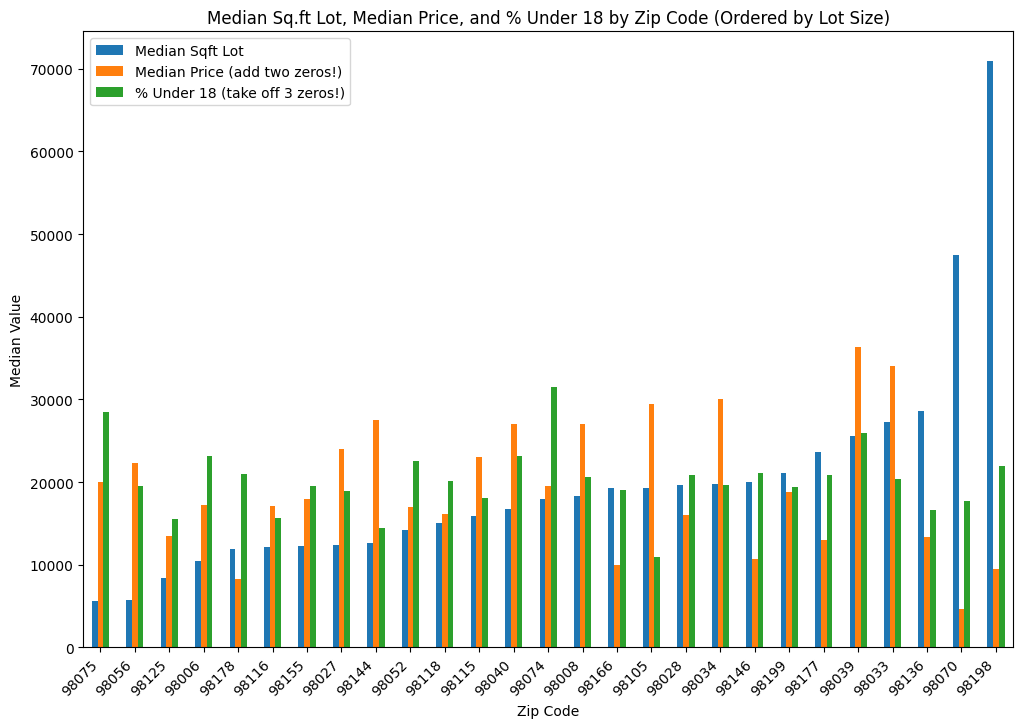

In [23]:
# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_merged_bedrooms.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode and divide by 1000
median_price = df_merged_bedrooms.groupby('zipcode')['price'].median() / 100

# Combine median_sqft_lot15 and median_price into a DataFrame
df_median_combined = pd.DataFrame({'Median Sqft Lot': median_sqft_lot15, 'Median Price (add two zeros!)': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_median_combined.loc[sorted_zipcodes]

# Grab %_under_18 for each zipcode
under_18 = df_merged_bedrooms.groupby('zipcode')['% Under 18'].median() * 1000

# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Median Sq.ft Lot, Median Price, and % Under 18 by Zip Code (Ordered by Lot Size)')
plt.xlabel('Zip Code')
plt.ylabel('Median Value')
plt.xticks(rotation=45, ha='right')

plt.show()

### Removing all Zip Codes with Greater than 19% Population as Under 18

In [24]:
df_19less_kids = df_merged_bedrooms[df_merged_bedrooms['% Under 18'] <= 19.0]
df_19less_kids.reset_index(drop=True, inplace=True)
df_19less_kids

price  sqft_lot  condition  grade  zipcode      lat     long  \
0   1350000.0   65005.0          5      9    98070  47.4041 -122.451   
1    655000.0   15798.0          3      7    98166  47.4497 -122.375   
2   2130000.0   24069.0          4     12    98166  47.4169 -122.348   
3    290000.0    8313.0          4      5    98070  47.4339 -122.512   
4    995000.0   47044.0          3      9    98166  47.4734 -122.365   
5   3600000.0   12431.0          3     10    98144  47.5925 -122.287   
6   1900000.0   32044.0          3     12    98166  47.4485 -122.369   
7   1710000.0   27702.0          3     10    98116  47.5596 -122.403   
8    340000.0   48292.0          5      6    98070  47.4285 -122.511   
9   2200000.0   10450.0          3     11    98027  47.5554 -122.077   
10  1340000.0   34689.0          3      9    98136  47.5489 -122.398   
11  3650000.0   19401.0          5     11    98105  47.6515 -122.277   
12  1360000.0   14138.0          3      8    98125  47.7142 -122.277   
13  1190000.0    8112.0          4      8    98125  47.7134 -122.277   
14   985000.0   26761.0          3      7    98166  47.4499 -122.376   
15  1580000.0   22672.0          4      8    98166  47.4414 -122.354   
16  1660000.0   19200.0          4      9    98136  47.5250 -122.393   
17  1180000.0   23180.0          3      8    98136  47.5495 -122.398   
18  2560000.0   26211.0          2     10    98105  47.6610 -122.269   
19  2300000.0   15929.0          3     12    98115  47.6934 -122.271   
20   770000.0   21744.0          4      9    98166  47.4536 -122.376   
21  1900000.0   13237.0          3      8    98144  47.5924 -122.287   
22   685000.0   15239.0          3      6    98166  47.4502 -122.378   
23   635000.0  167125.0          4      7    98070  47.4590 -122.504   
24  2600000.0   12195.0          3     11    98027  47.5696 -122.090   
25   947500.0   27144.0          5      8    98166  47.4522 -122.378   
26  2230000.0   28064.0          5     10    98136  47.5516 -122.398   
27   465000.0   19271.0          3      7    98070  47.4728 -122.497   
28   658000.0   14244.0          1      5    98136  47.5476 -122.399   
29  1640000.0   21164.0          3     12    98166  47.4418 -122.354   
30  1340000.0   13342.0          3      7    98125  47.7308 -122.282   
31  1310000.0   12215.0          3      9    98166  47.4396 -122.353   
32   340000.0   11834.0          3      6    98070  47.4557 -122.443   
33   750000.0   69351.0          4      9    98070  47.4000 -122.420   
34  2510000.0   57990.0          3     11    98166  47.4558 -122.371   
35  2050000.0   19989.0          4      7    98125  47.7087 -122.276   
36   528000.0   40642.0          4      6    98070  47.4040 -122.447   
37  2950000.0   25470.0          5     10    98105  47.6608 -122.269   
38  1680000.0    8343.0          4      9    98125  47.7265 -122.281   
39   380000.0   17342.0          3     10    98166  47.4551 -122.373   
40   385000.0   26329.0          4      6    98070  47.4012 -122.425   
41  1150000.0    6788.0          3      7    98125  47.7336 -122.284   
42   988500.0   16807.0          3      9    98166  47.4500 -122.377   

    sqft_lot15  price_sqft  % Under 18  % Over 65  % Over 21  
0      72513.0  490.374137        17.7       27.2       80.2  
1      13193.0  451.724138        19.0       19.4       78.0  
2     104374.0  394.225430        19.0       19.4       78.0  
3      26289.0  659.090909        17.7       27.2       80.2  
4      18512.0  227.168950        19.0       19.4       78.0  
5      12620.0  717.131474        14.5       16.8       83.9  
6      26988.0  514.905149        19.0       19.4       78.0  
7      12119.0  686.746988        15.7       14.7       82.8  
8      80201.0  320.754717        17.7       27.2       80.2  
9      14810.0  367.278798        18.9       15.5       78.4  
10     28598.0  629.107981        16.6       14.6       82.0  
11     15810.0  666.058394        10.9        7.6       65.9  
12      8279.0  519.

### 9 Zip Codes Remaining

In [25]:
df_19less_kids['zipcode'].value_counts()

zipcode
98166    14
98070     9
98125     6
98136     5
98105     3
98144     2
98027     2
98116     1
98115     1
Name: count, dtype: int64

### Found Outlier ZipCode, with very low % Under 18, but also very low % Over 21

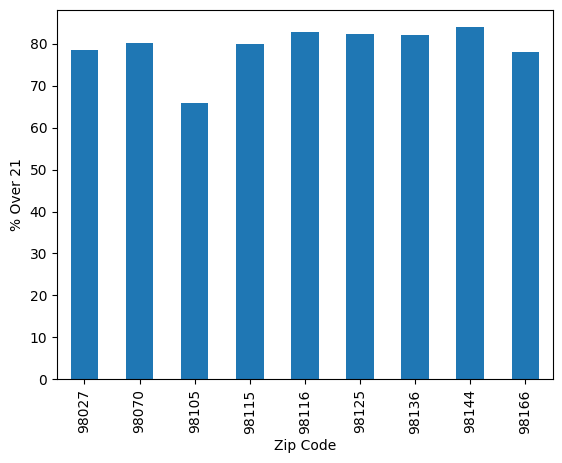

In [26]:
# Group by 'zipcode' and calculate the mean '%_over_21' for each zip code
mean_over_21_by_zipcode = df_19less_kids.groupby('zipcode')['% Over 21'].mean()

# Plot the bar graph with zip codes on the x-axis
mean_over_21_by_zipcode.plot(kind='bar', xlabel='Zip Code', ylabel='% Over 21')
plt.show()

### Removing University ZipCodes with less than %75 Population Over 21

In [27]:
df_2175_kids = df_19less_kids[df_19less_kids['% Over 21'] > 75.0]
df_2175_kids.reset_index(drop=True, inplace=True)
df_2175_kids

price  sqft_lot  condition  grade  zipcode      lat     long  \
0   1350000.0   65005.0          5      9    98070  47.4041 -122.451   
1    655000.0   15798.0          3      7    98166  47.4497 -122.375   
2   2130000.0   24069.0          4     12    98166  47.4169 -122.348   
3    290000.0    8313.0          4      5    98070  47.4339 -122.512   
4    995000.0   47044.0          3      9    98166  47.4734 -122.365   
5   3600000.0   12431.0          3     10    98144  47.5925 -122.287   
6   1900000.0   32044.0          3     12    98166  47.4485 -122.369   
7   1710000.0   27702.0          3     10    98116  47.5596 -122.403   
8    340000.0   48292.0          5      6    98070  47.4285 -122.511   
9   2200000.0   10450.0          3     11    98027  47.5554 -122.077   
10  1340000.0   34689.0          3      9    98136  47.5489 -122.398   
11  1360000.0   14138.0          3      8    98125  47.7142 -122.277   
12  1190000.0    8112.0          4      8    98125  47.7134 -122.277   
13   985000.0   26761.0          3      7    98166  47.4499 -122.376   
14  1580000.0   22672.0          4      8    98166  47.4414 -122.354   
15  1660000.0   19200.0          4      9    98136  47.5250 -122.393   
16  1180000.0   23180.0          3      8    98136  47.5495 -122.398   
17  2300000.0   15929.0          3     12    98115  47.6934 -122.271   
18   770000.0   21744.0          4      9    98166  47.4536 -122.376   
19  1900000.0   13237.0          3      8    98144  47.5924 -122.287   
20   685000.0   15239.0          3      6    98166  47.4502 -122.378   
21   635000.0  167125.0          4      7    98070  47.4590 -122.504   
22  2600000.0   12195.0          3     11    98027  47.5696 -122.090   
23   947500.0   27144.0          5      8    98166  47.4522 -122.378   
24  2230000.0   28064.0          5     10    98136  47.5516 -122.398   
25   465000.0   19271.0          3      7    98070  47.4728 -122.497   
26   658000.0   14244.0          1      5    98136  47.5476 -122.399   
27  1640000.0   21164.0          3     12    98166  47.4418 -122.354   
28  1340000.0   13342.0          3      7    98125  47.7308 -122.282   
29  1310000.0   12215.0          3      9    98166  47.4396 -122.353   
30   340000.0   11834.0          3      6    98070  47.4557 -122.443   
31   750000.0   69351.0          4      9    98070  47.4000 -122.420   
32  2510000.0   57990.0          3     11    98166  47.4558 -122.371   
33  2050000.0   19989.0          4      7    98125  47.7087 -122.276   
34   528000.0   40642.0          4      6    98070  47.4040 -122.447   
35  1680000.0    8343.0          4      9    98125  47.7265 -122.281   
36   380000.0   17342.0          3     10    98166  47.4551 -122.373   
37   385000.0   26329.0          4      6    98070  47.4012 -122.425   
38  1150000.0    6788.0          3      7    98125  47.7336 -122.284   
39   988500.0   16807.0          3      9    98166  47.4500 -122.377   

    sqft_lot15  price_sqft  % Under 18  % Over 65  % Over 21  
0      72513.0  490.374137        17.7       27.2       80.2  
1      13193.0  451.724138        19.0       19.4       78.0  
2     104374.0  394.225430        19.0       19.4       78.0  
3      26289.0  659.090909        17.7       27.2       80.2  
4      18512.0  227.168950        19.0       19.4       78.0  
5      12620.0  717.131474        14.5       16.8       83.9  
6      26988.0  514.905149        19.0       19.4       78.0  
7      12119.0  686.746988        15.7       14.7       82.8  
8      80201.0  320.754717        17.7       27.2       80.2  
9      14810.0  367.278798        18.9       15.5       78.4  
10     28598.0  629.107981        16.6       14.6       82.0  
11      8279.0  519.083969        15.5       17.0       82.4  
12      8408.0  572.115385        15.5       17.0       82.4  
13     12396.0  362.132353        19.0       19.4       78.0  
14     22672.0  605.363985        19.0       19.4       78.0  
15      7000.0  471.590909        16.6       14

# 8 Zip Codes Remaining After Age of Population Client Criteria Applied

In [28]:
df_2175_kids['zipcode'].nunique()

8

### Comparing Housing Density (Median Lot sq.footage), Median Prices and % under 18 of Remaining 8 ZipCodes

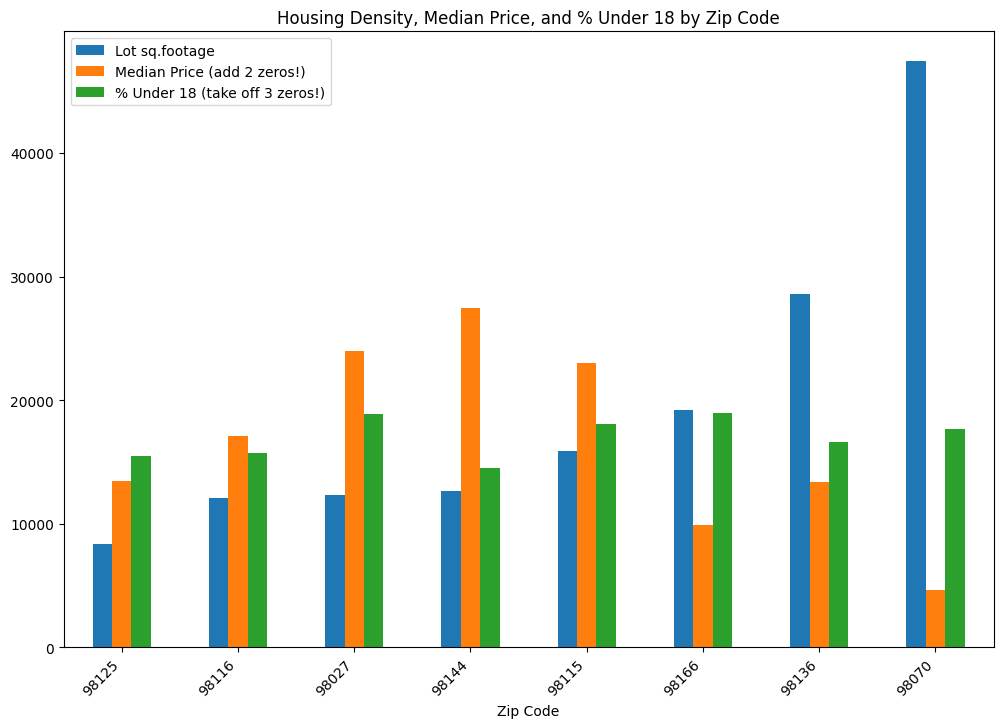

In [29]:
# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_2175_kids.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode and divide by 1000
median_price = df_2175_kids.groupby('zipcode')['price'].median() / 100

# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Lot sq.footage': median_sqft_lot15, 'Median Price (add 2 zeros!)': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_combined.loc[sorted_zipcodes]

# Calculate median %_under_18 for each zipcode
median_under_18 = df_2175_kids.groupby('zipcode')['% Under 18'].median()*1000

# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Housing Density, Median Price, and % Under 18 by Zip Code')
plt.xlabel('Zip Code')
plt.xticks(rotation=45, ha='right')

plt.show()


# Getting Closer to City Center

### 15 Kilometers -- Leaves 6 Zip Codes

In [30]:
# Define the radius (in kilometers) within which to include houses
radius_km = 15

# Filter the DataFrame to include only rows within the specified radius
filtered2 = df_2175_kids[df_2175_kids.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)
# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in filtered2.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('maps/15km_waterfront_filters.html')

# Display HTML file using an iframe
display(m)

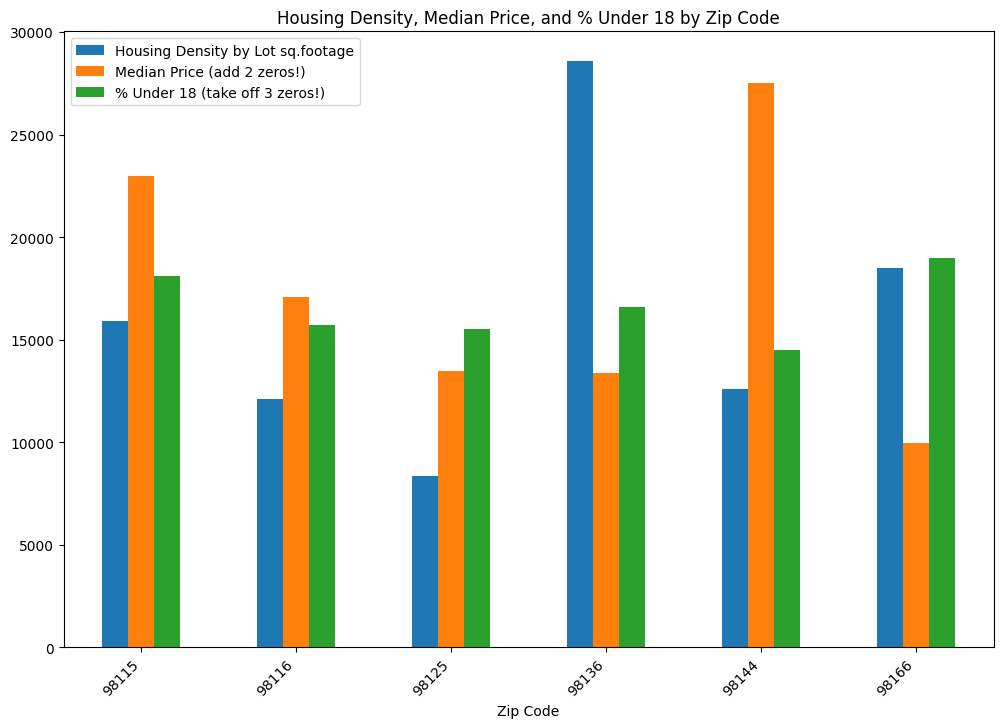

In [31]:
# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = filtered2.groupby('zipcode')['sqft_lot15'].median()
# Calculate median price for each zipcode and divide by 1000
median_price = filtered2.groupby('zipcode')['price'].median() / 100
# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Housing Density by Lot sq.footage': median_sqft_lot15, 'Median Price (add 2 zeros!)': median_price})
# Calculate median %_under_18 for each zipcode
median_under_18 = filtered2.groupby('zipcode')['% Under 18'].median() * 1000
# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Housing Density, Median Price, and % Under 18 by Zip Code')
plt.xlabel('Zip Code')
plt.xticks(rotation=45, ha='right')

plt.show()

### Within 9km of City Center -- Leaves 3 Zip Codes

In [32]:
# Define the radius (in kilometers) within which to include houses
radius_km = 9

# Filter the DataFrame to include only rows within the specified radius
df_9km = df_2175_kids[df_2175_kids.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)
# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in df_9km.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('maps/9km_waterfront_filters.html')

# Display HTML file using an iframe
display(m)

### Within 5 Kilometers -- Leaves Only 1 Zip Code

In [33]:
# Define the radius (in kilometers) within which to include houses
radius_km = 5

# Filter the DataFrame to include only rows within the specified radius
df_5km = df_2175_kids[df_2175_kids.apply(distance_to_center, axis=1) <= radius_km]

# Create a map centered around Seattle
m = folium.Map(location=seattle_coords, zoom_start=10)
# Create a marker cluster layer
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each house within the radius
for _, row in df_5km.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Save the map to an HTML file
m.save('maps/5km_waterfront_filters.html')

# Display HTML file using an iframe
display(m)

# Focusing on 9km Radius, leaving 3 Zip Codes to Explore

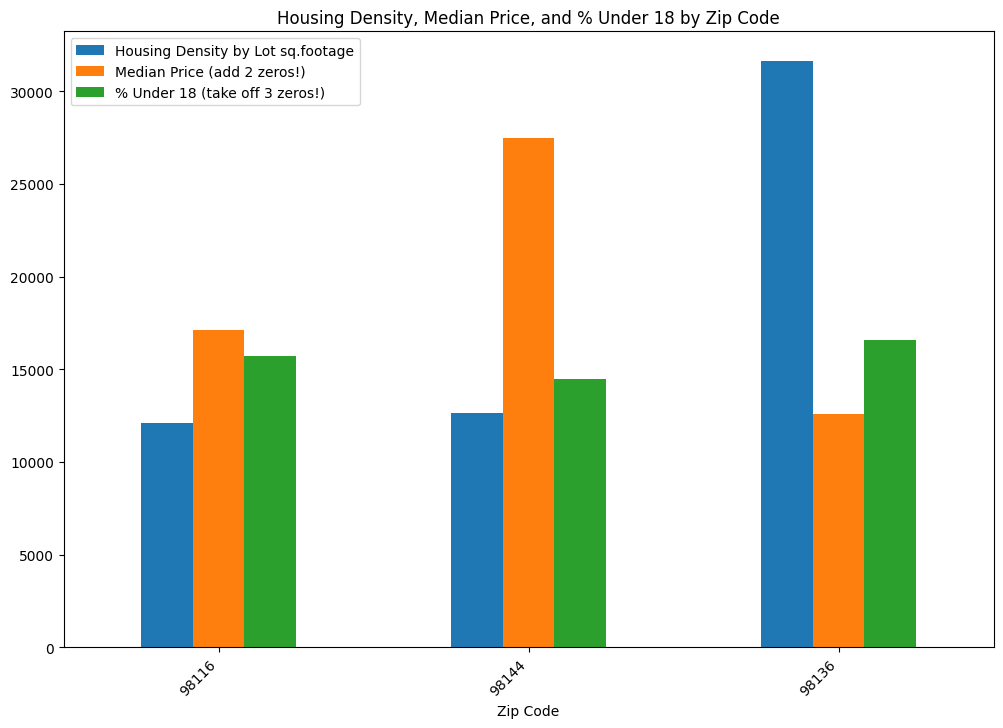

In [34]:
# Calculate median sqft_lot15 for each zipcode
median_sqft_lot15 = df_9km.groupby('zipcode')['sqft_lot15'].median()

# Calculate median price for each zipcode and divide by 1000
median_price = df_9km.groupby('zipcode')['price'].median() / 100

# Combine median_sqft_lot15 and median_price into a DataFrame
df_combined = pd.DataFrame({'Housing Density by Lot sq.footage': median_sqft_lot15, 'Median Price (add 2 zeros!)': median_price})

# Sort zip codes based on median sqft_lot15
sorted_zipcodes = median_sqft_lot15.sort_values().index

# Reorder the levels of the 'zipcode' column
df_combined = df_combined.loc[sorted_zipcodes]

# Calculate median %_under_18 for each zipcode
median_under_18 = df_9km.groupby('zipcode')['% Under 18'].median() * 1000

# Combine median_under_18 with existing DataFrame
df_combined['% Under 18 (take off 3 zeros!)'] = median_under_18

# Plot the three columns side by side for each zipcode
ax = df_combined.plot(kind='bar', figsize=(12, 8))

# Set title and labels
plt.title('Housing Density, Median Price, and % Under 18 by Zip Code')
plt.xlabel('Zip Code')
plt.xticks(rotation=45, ha='right')

plt.show()

### Final CSV File Export

In [35]:
# Write DataFrame to a CSV file
df_9km.to_csv('data/9km_waterfront.csv')

# **Conclusion**


### **Price Cap:** ~$2.6 Million for 'Upper Middle Class' Home 

### **Location:** Waterfront property as close to city center as budget permits

### **Distance to Center:** 9km radius is as close to center as budget permits, while still offering a variety of neighborhoods

### **Age Restriction:** 75% of Neighborhood must be over 21, less than 20% under 18

### **Neighborhoods:** Zip Codes 98116, 98144 and 98136 